In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [9]:
file_names = os.listdir('train/')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [31]:
img=mpimg.imread('train/cat.4352.jpg')

In [32]:
img

array([[[ 56,  46,  36],
        [ 56,  46,  36],
        [ 56,  46,  36],
        ...,
        [ 28,  27,  23],
        [ 28,  27,  23],
        [ 27,  26,  22]],

       [[ 56,  46,  36],
        [ 56,  46,  36],
        [ 56,  46,  36],
        ...,
        [ 28,  27,  23],
        [ 28,  27,  23],
        [ 27,  26,  22]],

       [[ 57,  47,  37],
        [ 57,  47,  37],
        [ 57,  47,  37],
        ...,
        [ 29,  28,  24],
        [ 28,  27,  23],
        [ 27,  26,  22]],

       ...,

       [[167, 158, 143],
        [166, 157, 142],
        [164, 155, 140],
        ...,
        [198, 175, 159],
        [194, 171, 155],
        [191, 168, 152]],

       [[167, 158, 143],
        [165, 156, 141],
        [162, 153, 138],
        ...,
        [200, 177, 161],
        [197, 174, 158],
        [192, 169, 153]],

       [[176, 167, 152],
        [173, 164, 149],
        [169, 160, 145],
        ...,
        [203, 180, 164],
        [201, 178, 162],
        [194, 171, 155]]

In [33]:
img.shape

(357, 400, 3)

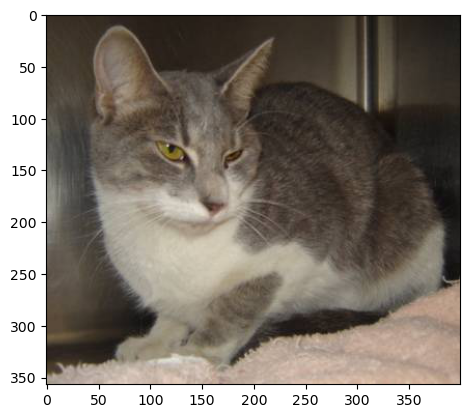

In [34]:
plt.imshow(img)

In [35]:
file_names = os.listdir('train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [36]:
os.mkdir('image resized/')

**Resizing all the images**


In [69]:
#CatResizedImages
original_folder = 'train/'
resized_folder = 'image resized/'

for i in range(2000,3000,1):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [50]:
#DogResizedImages
original_folder = 'train/'
resized_folder = 'image resized/'

for i in range(22000,25000,1):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [75]:
file_names = os.listdir('image resized/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 3000
Number of cat images = 3000


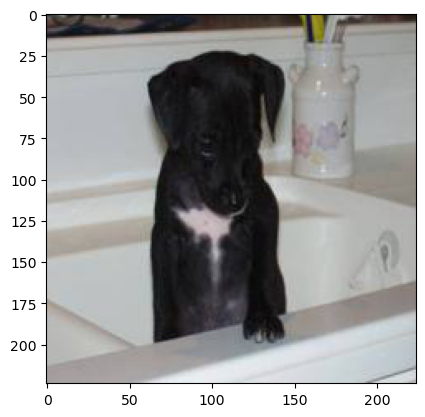

In [71]:
# display resized dog image
img = mpimg.imread('image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

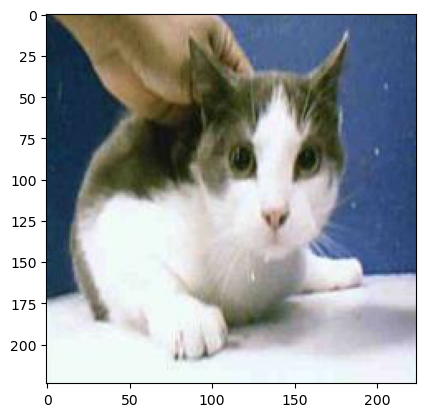

In [72]:
# display resized cat image
img = mpimg.imread('image resized/cat.1060.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [76]:
# creaing a for loop to assign labels
filenames = os.listdir('image resized/')


labels = []

for i in range(6000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [77]:
count0=0
count1=0
for i in labels:
    if i==0:
        count0+=1
    else:
        count1+=1
print(count0)
print(count1)

3000
3000


In [78]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[3000 3000]


**Converting all the resized images to numpy arrays**

In [79]:
import cv2
import glob

In [80]:
image_directory = 'image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [81]:
type(dog_cat_images)

numpy.ndarray

In [82]:
dog_cat_images.shape

(6000, 224, 224, 3)

In [83]:
dog_cat_images

array([[[[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [123, 200, 246],
         [123, 200, 246]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [124, 201, 247],
         [123, 200, 246]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [124, 201, 247],
         [124, 201, 247]],

        ...,

        [[ 57, 123, 158],
         [ 57, 123, 158],
         [ 56, 124, 159],
         ...,
         [  0,   2,   1],
         [  0,   2,   1],
         [  0,   2,   1]],

        [[ 55, 121, 156],
         [ 56, 122, 157],
         [ 55, 123, 158],
         ...,
         [  0,   2,   1],
         [  0,   2,   1],
         [  0,   2,   1]],

        [[ 54, 120, 155],
         [ 54, 120, 155],
         [ 53, 121, 156],
         ...,
         [  0,   2,   1],
        

In [84]:
X = dog_cat_images
Y = np.asarray(labels)

In [86]:
X

array([[[[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [123, 200, 246],
         [123, 200, 246]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [124, 201, 247],
         [123, 200, 246]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [124, 201, 247],
         [124, 201, 247]],

        ...,

        [[ 57, 123, 158],
         [ 57, 123, 158],
         [ 56, 124, 159],
         ...,
         [  0,   2,   1],
         [  0,   2,   1],
         [  0,   2,   1]],

        [[ 55, 121, 156],
         [ 56, 122, 157],
         [ 55, 123, 158],
         ...,
         [  0,   2,   1],
         [  0,   2,   1],
         [  0,   2,   1]],

        [[ 54, 120, 155],
         [ 54, 120, 155],
         [ 53, 121, 156],
         ...,
         [  0,   2,   1],
        

In [87]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [91]:
print(X.shape, X_train.shape, X_test.shape)

(6000, 224, 224, 3) (4800, 224, 224, 3) (1200, 224, 224, 3)


In [99]:
values, counts = np.unique(Y_train, return_counts=True)
print(values)
print(counts)

[0 1]
[2400 2400]


In [100]:
values, counts = np.unique(Y_test, return_counts=True)
print(values)
print(counts)

[0 1]
[600 600]


In [92]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [93]:
print(X_train_scaled)

[[[[0.61960784 0.65490196 0.69019608]
   [0.60784314 0.64313725 0.67843137]
   [0.58823529 0.62352941 0.65882353]
   ...
   [0.48235294 0.51372549 0.54117647]
   [0.52156863 0.55294118 0.58039216]
   [0.58039216 0.61176471 0.63921569]]

  [[0.62352941 0.65882353 0.69411765]
   [0.6        0.63529412 0.67058824]
   [0.57254902 0.60784314 0.64313725]
   ...
   [0.50980392 0.54117647 0.56862745]
   [0.53333333 0.56470588 0.59215686]
   [0.57254902 0.60392157 0.63137255]]

  [[0.64313725 0.67843137 0.71372549]
   [0.60784314 0.64313725 0.67843137]
   [0.57254902 0.60784314 0.64313725]
   ...
   [0.54117647 0.57254902 0.6       ]
   [0.54509804 0.57647059 0.60392157]
   [0.56078431 0.59215686 0.61960784]]

  ...

  [[0.30588235 0.34509804 0.38431373]
   [0.30588235 0.34509804 0.38431373]
   [0.3254902  0.36078431 0.4       ]
   ...
   [0.3254902  0.33333333 0.37254902]
   [0.31764706 0.3254902  0.36470588]
   [0.3372549  0.34509804 0.38431373]]

  [[0.28235294 0.32156863 0.36078431]
   [0.2

**Building the Neural Network**

In [96]:
import tensorflow as tf
import tensorflow_hub as hub

In [97]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [101]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [102]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [103]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
150/150 [==============================] - 88s 532ms/step - loss: 0.1082 - acc: 0.9590
Epoch 2/5
150/150 [==============================] - 77s 512ms/step - loss: 0.0520 - acc: 0.9829
Epoch 3/5
150/150 [==============================] - 97s 650ms/step - loss: 0.0410 - acc: 0.9858
Epoch 4/5
150/150 [==============================] - 93s 617ms/step - loss: 0.0377 - acc: 0.9877
Epoch 5/5
150/150 [==============================] - 87s 583ms/step - loss: 0.0291 - acc: 0.9894


In [104]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

38/38 [==============================] - 22s 532ms/step - loss: 0.0578 - acc: 0.9850
Test Loss = 0.0577981173992157
Test Accuracy = 0.9850000143051147


**Predictive System**

Path of the image to be predicted:  dt.jpg


1/1 [==============================] - 0s 63ms/step
[[-4.8150387  5.183063 ]]
1
The image represents a Dog


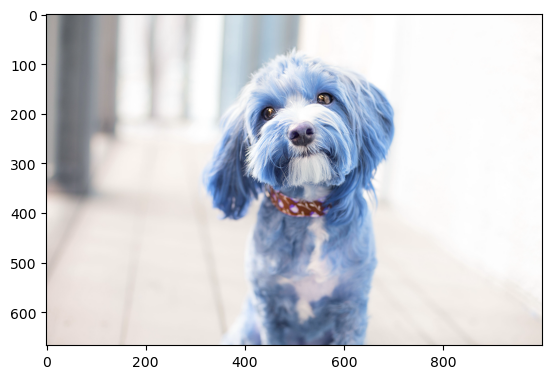

In [108]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted:  cat.jpg


1/1 [==============================] - 0s 90ms/step
[[ 5.7369604 -6.1499767]]
0
The image represents a Cat


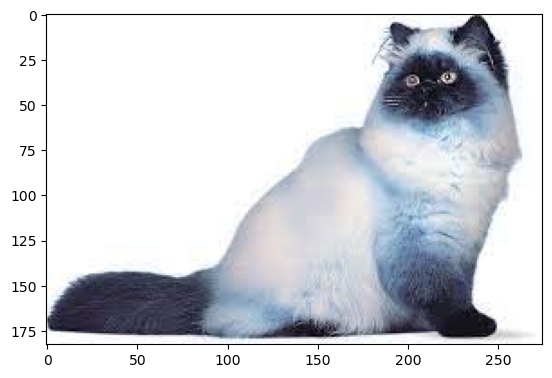

In [107]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')